In [1]:
!unzip "/content/FruitinAmazon.zip"

Archive:  /content/FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmazon/train

# 6 Simple CNN Implemented using Keras.

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9061 - loss: 0.3103 - val_accuracy: 0.9833 - val_loss: 0.0490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9858 - loss: 0.0436 - val_accuracy: 0.9897 - val_loss: 0.0320
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9910 - loss: 0.0281 - val_accuracy: 0.9875 - val_loss: 0.0357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9904 - val_loss: 0.0320
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9945 - loss: 0.0151 - val_accuracy: 0.9913 - val_loss: 0.0309
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0389
Test accuracy: 0.9913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# 7 Exercise.

# Task 1: Data Understanding and Visualization:

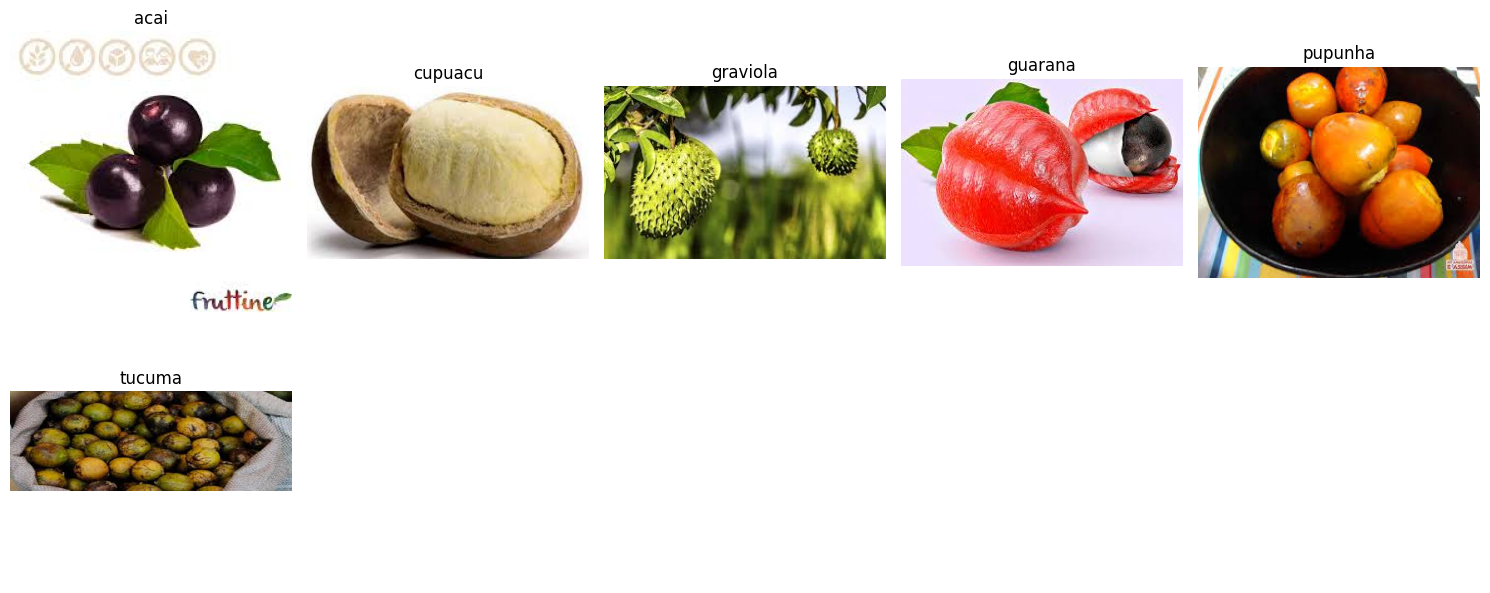

In [5]:
import os
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the ZIP file
zip_path = "/content/FruitinAmazon.zip"  # Update this if needed
extract_path = "/content/FruitinAmazon"

# Extract the ZIP file if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Define the train dataset directory
train_dir = os.path.join(extract_path, "train")  # Adjust if needed

# Check if the directory exists
if not os.path.isdir(train_dir):
    raise ValueError(f"Train directory not found: {train_dir}")

# Get the list of class directories
class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# Select one random image from each class
selected_images = []
labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    if images:
        img_path = os.path.join(class_path, random.choice(images))
        selected_images.append(img_path)
        labels.append(class_name)

# Plot images in a grid format
num_classes = len(selected_images)
cols = 5  # Number of columns
rows = (num_classes + cols - 1) // cols  # Compute rows dynamically

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
axes = axes.flatten()

for i in range(rows * cols):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        axes[i].imshow(img)
        axes[i].set_title(labels[i])
        axes[i].axis("off")
    else:
        axes[i].axis("off")  # Hide extra subplots

plt.tight_layout()
plt.show()


• What did you Observe?

-> Class Distribution, Image Variety, Dataset Size and Balance, Image Quality & Resolution, Potential Preprocessing Needs.

# Check for Corrupted Image

In [6]:
import os
from PIL import Image

# Define the path to the train dataset folder
train_dir = "/content/FruitinAmazon/train"  # Update this path if necessary

# List to store corrupted image paths
corrupted_images = []

# Iterate through each class directory
for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                # Try opening the image
                with Image.open(image_path) as img:
                    img.verify()  # Verify the image integrity

            except (IOError, SyntaxError):
                # If an error occurs, remove the corrupted image
                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

# Final Report
if not corrupted_images:
    print("No corrupted images found.")
else:
    print(f"\nTotal corrupted images removed: {len(corrupted_images)}")


No corrupted images found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [7]:
import tensorflow as tf

# Define dataset directory
train_dir = "/content/FruitinAmazon/train"  # Update path if necessary

# Define image size and batch size
img_height = 128  # Target image height
img_width = 128   # Target image width
batch_size = 32   # Number of images per batch
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Uses subdirectory names as class labels
    label_mode='int',   # Labels are encoded as integers
    image_size=(img_height, img_width),  # Resize images
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,  # Shuffle training data
    validation_split=validation_split,  # Split data
    subset='training',  # Use training subset
    seed=123  # Ensure reproducibility
)

# Apply normalization to training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
    validation_split=validation_split,
    subset='validation',  # Use validation subset
    seed=123
)

# Apply normalization to validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Print dataset info
print(f"Training batches: {len(train_ds)}, Validation batches: {len(val_ds)}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training batches: 3, Validation batches: 1


# Task 3 - Implement a CNN

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define image size and number of classes
img_height = 128
img_width = 128
num_classes = 10  # Update this based on the dataset

# Build the CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu",
                  input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Print the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Define callbacks
checkpoint_cb = ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True, verbose=1
)
early_stopping_cb = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True, verbose=1
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=16,  # Note: image_dataset_from_directory handles batching, so no need to set batch_size here.
    epochs=250,
    callbacks=[checkpoint_cb, early_stopping_cb]
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.0394 - loss: 2.4666 
Epoch 1: val_accuracy improved from -inf to 0.05556, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.0434 - loss: 2.4931 - val_accuracy: 0.0556 - val_loss: 1.8443
Epoch 2/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.3438 - loss: 2.1116
Epoch 2: val_accuracy improved from 0.05556 to 0.77778, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3199 - loss: 2.0068 - val_accuracy: 0.7778 - val_loss: 1.6012
Epoch 3/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2812 - loss: 1.8768
Epoch 3: val_accuracy did not improve from 0.77778
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3260 - loss: 1.8287 - val_accuracy: 0.4444 - val_loss: 1.5469
Epoch 4/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2188 - loss: 1.8027
Epoch 4: val_accuracy improved from 0.77778 to 0.83333, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2708 - loss: 1.6571 - val_accuracy: 0.8333 - val_loss: 1.0950
Epoch 5/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4375 - loss: 1.3664
Epoch 5: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5169 - loss: 1.2961 - val_accuracy: 0.6111 - val_loss: 1.0458
Epoch 6/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6875 - loss: 0.9887
Epoch 6: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6662 - loss: 0.9745 - val_accuracy: 0.5556 - val_loss: 1.4585
Epoch 7/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9062 - loss: 0.7359
Epoch 7: val_accuracy improved from 0.83333 to 0.88889, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8394 - loss: 0.8063 - val_accuracy: 0.8889 - val_loss: 0.5373
Epoch 8/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8750 - loss: 0.5467
Epoch 8: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8207 - loss: 0.5985 - val_accuracy: 0.8333 - val_loss: 0.6185
Epoch 9/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9688 - loss: 0.3126
Epoch 9: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9418 - loss: 0.3661 - val_accuracy: 0.7778 - val_loss: 0.7129
Epoch 10/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9062 - loss: 0.3056
Epoch 10: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9006 - loss: 0.3076 - val_accuracy: 0.7222 - val_loss: 0.4607
Epoch 11/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9688 - loss: 0.2409
Epoch 11: val_accuracy did not improve from 0.88889


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 0.0351 - val_accuracy: 0.9444 - val_loss: 0.2199
Epoch 15/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.0417
Epoch 15: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0391 - val_accuracy: 0.8333 - val_loss: 0.4393
Epoch 16/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0346
Epoch 16: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0279 - val_accuracy: 0.8333 - val_loss: 0.6026
Epoch 17/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0172
Epoch 17: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0171 - val_accuracy: 0.8333 - val_loss: 0.4551
Epoch 18/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0102
Epoch 18: val_accuracy did not improve from 0.9

# Task 5: Evaluate the Model


In [10]:
# Define path to the test dataset folder
test_dir = "/content/FruitinAmazon/test"

# Load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Apply normalization to test dataset (same as for train and val)
test_dataset = test_dataset.map(lambda x, y: (rescale(x), y))

# Now, evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step - accuracy: 0.7000 - loss: 0.8716
Test Accuracy: 0.7000
Test Loss: 0.8716


# Task 6: Save and Load the Model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Step 1: Save the trained model
model.save("my_cnn_model.h5")
print("Model saved successfully!")

# Step 2: Load the saved model
loaded_model = load_model("my_cnn_model.h5")
print("Model loaded successfully!")

# Step 3: Re-evaluate the model on the test dataset
# Ensure test_dataset is defined before evaluating
test_loss, test_accuracy = loaded_model.evaluate(test_dataset, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Model saved successfully!
Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step - accuracy: 0.7000 - loss: 0.8716
Test Accuracy: 0.7000
Test Loss: 0.8716


# Task 7: Predictions and Classification Report

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5
           3       0.67      0.80      0.73         5
           4       1.00      0.60      0.75         5
           5       0.67      0.40      0.50         5

    accuracy                           0.70        30
   macro avg       0.74      0.70      0.69        30
weighted avg       0.74      0.70      0.69        30



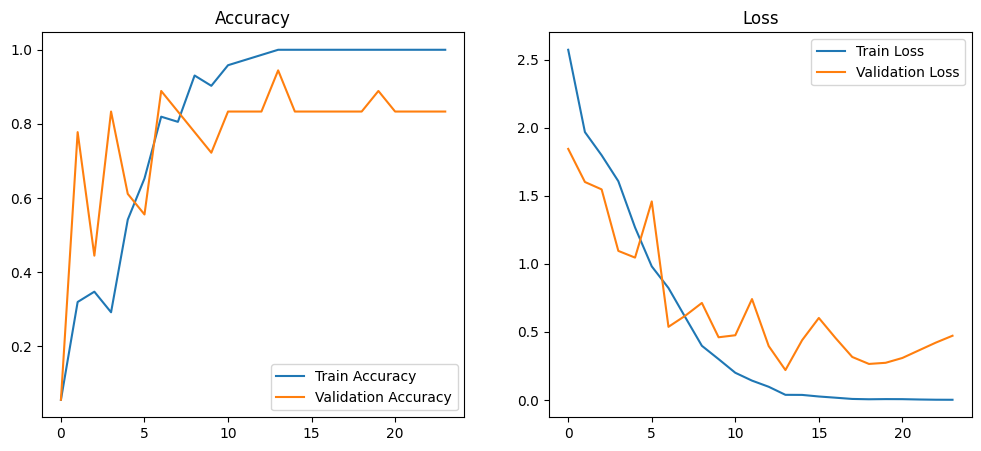

In [12]:
# Make predictions
y_pred_probs = loaded_model.predict(test_dataset)  # Use test_dataset instead of X_test
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels from test_dataset
y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())

# Classification report
!pip install scikit-learn
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred))  # Use y_true instead of y_test

# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

#Week-6


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 30 files belonging to 6 classes.
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,519,494 (24.87 MB)

 Trainable params: 6,518,534 (24.87 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.3003 - loss: 2.5446 - val_accuracy: 0.2667 - val_loss: 1.7841
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.4931 - loss: 1.7540 - val_accuracy: 0.3333 - val_loss: 1.7314
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5569 - loss: 1.3277 - val_accuracy: 0.2333 - val_loss: 1.8321
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.5994 - loss: 1.1830 - val_accuracy: 0.1333 - val_loss: 2.1008
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.5894 - loss: 1.1289 - val_accuracy: 0.2000 - val_loss: 2.5453
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.6771 - loss: 1.1517 - val_accuracy: 0.1667 - val_loss: 3.0798
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.6966 - loss: 0.9268 - val_accuracy: 0.1667 - val_loss: 3.6396
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.6593 - loss: 0.9284 - val_accuracy: 0.1667 - val_loss: 4

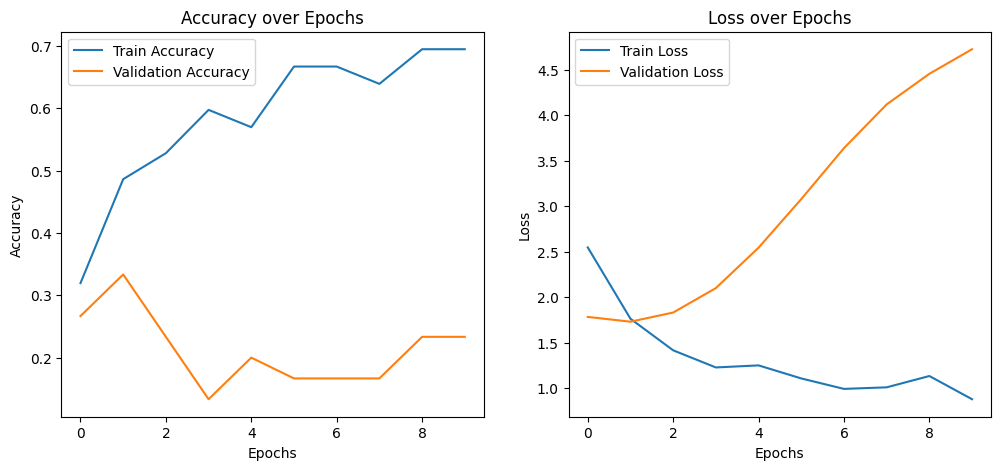

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2333 - loss: 4.7274
Final Test Accuracy: 0.2333


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = "/content/FruitinAmazon/train"
val_dir = "/content/FruitinAmazon/test"

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

# Create a data augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2)
])

# Load training dataset (before applying .map())
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Load validation dataset (without augmentation)
raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

# Get class names before transforming dataset
class_names = raw_train_ds.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")

# Apply augmentation and normalization to training dataset
train_ds = raw_train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.map(lambda x, y: (layers.Rescaling(1./255)(x), y))

# Normalize validation dataset
val_ds = raw_val_ds.map(lambda x, y: (layers.Rescaling(1./255)(x), y))

# Define a deeper CNN model with Batch Normalization & Dropout
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation="softmax")  # Output layer
])

# Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Display model summary
model.summary()

# Train model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

# Evaluate the final model
test_loss, test_acc = model.evaluate(val_ds)
print(f"Final Test Accuracy: {test_acc:.4f}")


In [14]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

# Load the pre-trained model (MobileNetV2) with ImageNet weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all layers of the base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(class_names), activation='softmax')(x)

# Create the new model
model_transfer = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model_transfer.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history_transfer = model_transfer.fit(train_ds, validation_data=val_ds, epochs=10)

# Evaluate the model
test_loss, test_acc = model_transfer.evaluate(val_ds)
print(f"Transfer Learning Test Accuracy: {test_acc:.4f}")

# Generate predictions for validation dataset
y_true = np.concatenate([y.numpy() for _, y in val_ds], axis=0)
y_pred = np.argmax(model_transfer.predict(val_ds), axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

# Compare results with the previous model
print("\nComparison:")
print(f"Scratch Model Test Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Test Accuracy: {test_acc:.4f}")


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.1567 - loss: 3.0353 - val_accuracy: 0.2000 - val_loss: 2.3127
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.2066 - loss: 2.8487 - val_accuracy: 0.2000 - val_loss: 2.1114
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.1832 - loss: 2.4104 - val_accuracy: 0.2000 - val_loss: 1.9528
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.1771 - loss: 2.4302 - val_accuracy: 0.2333 - val_loss: 1.8220
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.2765 - loss: 2.0283 - val_accuracy: 0.3000 - val_loss: 1.7083
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.2756 - loss: 2.0010 - val_accuracy: 0.3333 - val_loss: 1.6072
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.3099 - loss: 1.9088 - val_accuracy: 0.4000 - val_loss: 1.5195
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.4032 - loss: 1.6129 - val_accuracy: 0.4000 - val_loss: 1